In [3]:
import numpy as np
import torch
from torchvision import models
import gc
import matplotlib.pyplot as plt
from PIL import Image

In [6]:
with open(r"./girl.bmp", "rb") as fp:
    image = np.fromfile(fp, dtype = np.uint8)

In [7]:
image

array([ 66,  77,  54, ...,  44,  18, 255], dtype=uint8)

In [8]:
image.size

9437238

In [11]:
picture = Image.open(r"./girl.bmp")

In [13]:
picture.width, picture.height

(2048, 1152)

In [15]:
# BMP pixel arrays

image[54:]

array([ 73, 203, 203, ...,  44,  18, 255], dtype=uint8)

In [17]:
len(image[54:]) / picture.width

4608.0

In [27]:
picture.width * picture.height

2359296

In [28]:
picture.width * picture.height * 4

9437184

In [40]:
len(image[54:]) / 4

2359296.0

In [75]:
pixels = np.array(np.split(image[54:], 2359296))

In [55]:
pixsums = pixels.sum(axis = 1)

In [56]:
pixsums.size

2359296

In [57]:
pixsums.size / picture.width

1152.0

In [59]:
# woohooo motherfuckers!!

picture.height * picture.width == pixsums.size

True

In [66]:
pic_matrix = ((pixsums - 255) / 3).reshape(picture.height, picture.width)

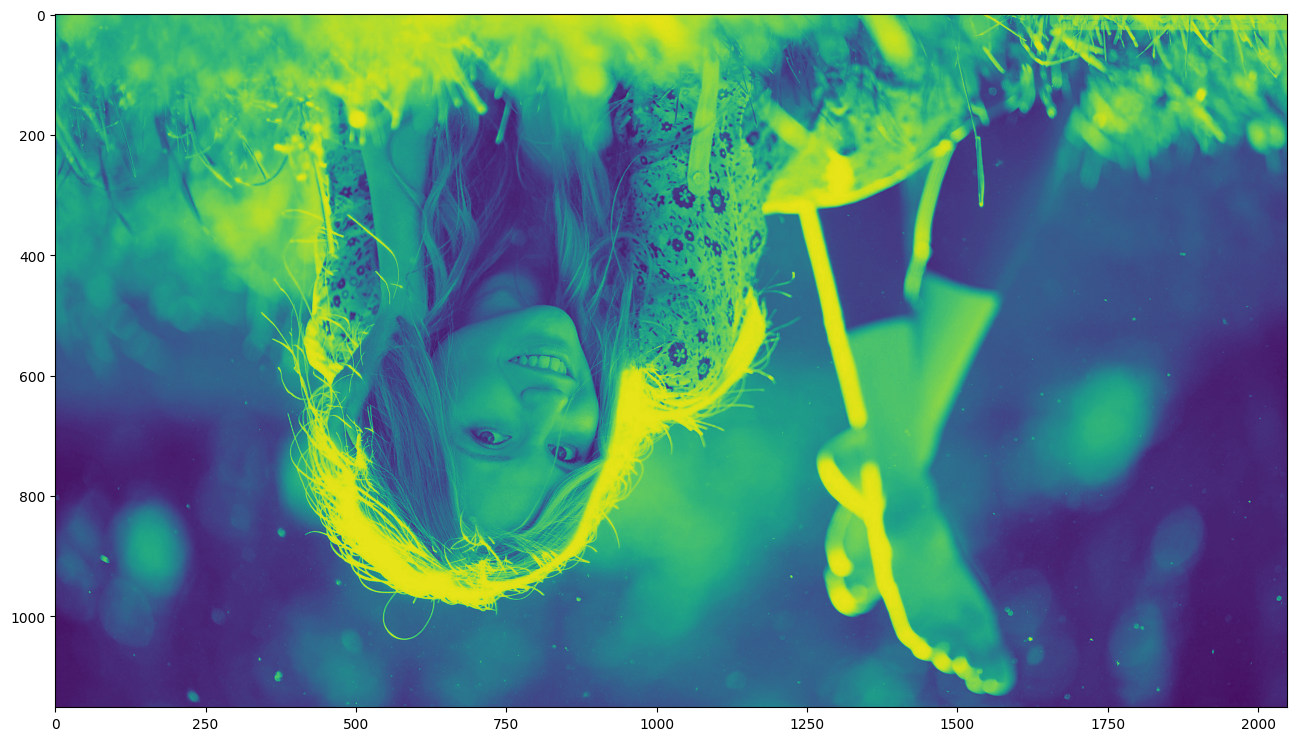

In [85]:
fig, axes = plt.subplots()
fig.set_size_inches(16, 9)
axes.imshow(pic_matrix)
plt.show()

In [77]:
np.flip(pixels).sum(axis = 1) - 255

array([ 93,  96,  96, ..., 482, 479, 479], dtype=uint32)

In [79]:
revmat = (np.flip(pixels).sum(axis = 1) - 255).reshape(picture.height, picture.width)

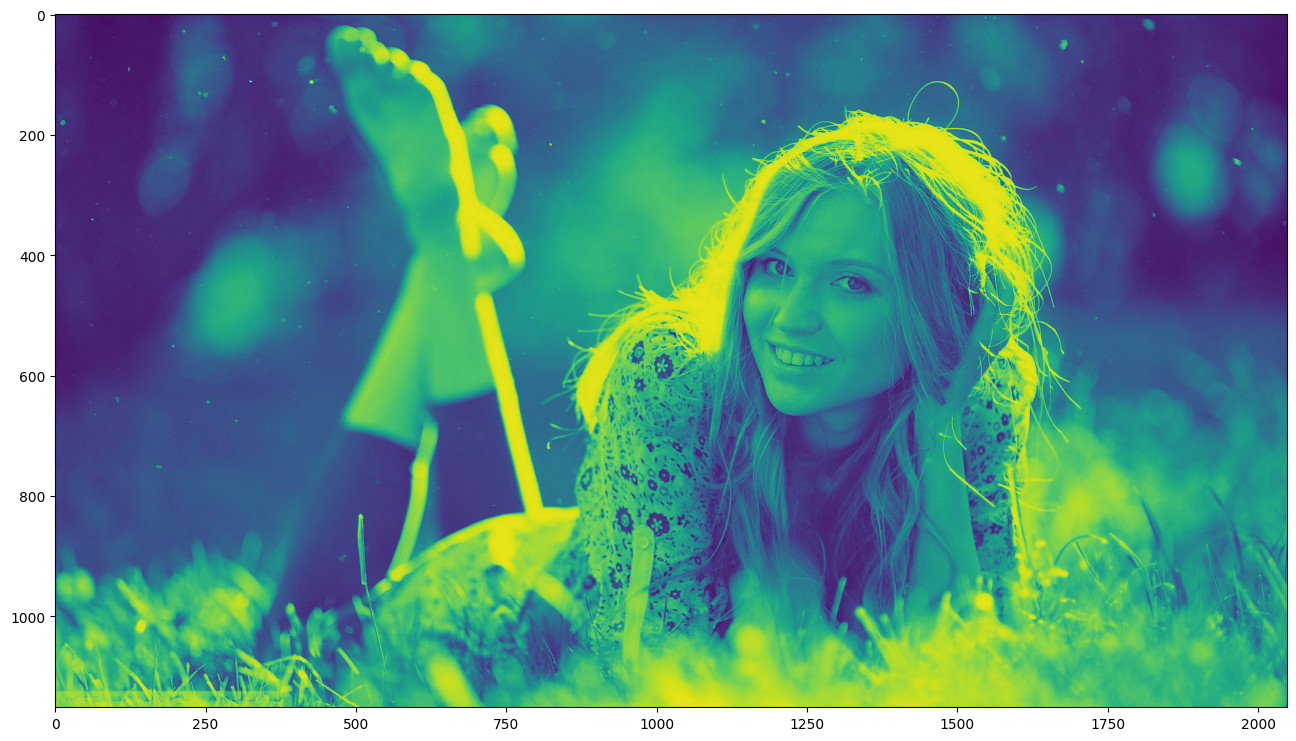

In [84]:
fig, axes = plt.subplots()
fig.set_size_inches(16, 9)
axes.imshow(revmat)
plt.show()

In [86]:
torch.cuda.is_available()

True

In [106]:
randoms = torch.randint(low = 0, high = 1000, size = (10_000, 10_000), dtype = torch.int16, device = torch.device("cuda:0"))

In [107]:
randoms.shape

torch.Size([10000, 10000])

In [112]:
randoms.sum()

tensor(49945217515, device='cuda:0')

In [113]:
randoms.median()

OutOfMemoryError: CUDA out of memory. Tried to allocate 764.00 MiB. GPU 0 has a total capacty of 2.00 GiB of which 0 bytes is free. Of the allocated memory 5.22 GiB is allocated by PyTorch, and 386.89 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [116]:
randoms.mean(dtype = torch.float64)

tensor(499.4522, device='cuda:0', dtype=torch.float64)

In [117]:
# can't do fancy stuff with just 2 gigs of GRAM :(
# disappointed.

In [160]:
[gc.collect(i) for i in range(3)]

[0, 0, 0]

In [4]:
# That's a lot
dir(models)

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'